In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')

In [3]:
data = pd.read_csv("C:/Users/kulsum kamal/Downloads/global_terrorism.csv", encoding='latin1', low_memory=False)

In [4]:
data.shape

(181691, 135)

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
missing_cols = data.isnull().sum().sort_values(ascending=False)

In [9]:
missing_cols[missing_cols>0]

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
guncertain1            380
ishostkid              178
specificity              6
doubtterr                1
multiple                 1
Length: 106, dtype: int64

In [10]:
missing_cols[:77]

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
propcomment         123732
propextent          117626
propextent_txt      117626
scite2              104758
ransom              104310
Length: 77, dtype: int64

In [11]:
X = data.copy()

In [12]:
missing_cols[:77].index

Index(['gsubname3', 'weapsubtype4_txt', 'weapsubtype4', 'weaptype4',
       'weaptype4_txt', 'claimmode3', 'claimmode3_txt', 'gsubname2', 'claim3',
       'guncertain3', 'gname3', 'divert', 'attacktype3', 'attacktype3_txt',
       'ransomnote', 'ransompaidus', 'ransomamtus', 'claimmode2',
       'claimmode2_txt', 'ransompaid', 'corp3', 'targsubtype3',
       'targsubtype3_txt', 'natlty3_txt', 'natlty3', 'target3', 'targtype3',
       'targtype3_txt', 'ransomamt', 'weapsubtype3_txt', 'weapsubtype3',
       'weaptype3_txt', 'weaptype3', 'claim2', 'guncertain2', 'gname2',
       'resolution', 'kidhijcountry', 'nhours', 'compclaim', 'gsubname',
       'attacktype2', 'attacktype2_txt', 'ndays', 'approxdate', 'corp2',
       'nreleased', 'targsubtype2', 'targsubtype2_txt', 'natlty2',
       'natlty2_txt', 'hostkidoutcome_txt', 'hostkidoutcome', 'target2',
       'targtype2_txt', 'targtype2', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype2', 'weaptype2_txt', 'nhostkidus', 'nhostkid', 'c

In [14]:
data['nhostkid'].value_counts()

 1.0      5504
 2.0      1855
-99.0     1237
 3.0      1046
 4.0       733
          ... 
 329.0       1
 750.0       1
 168.0       1
 117.0       1
 420.0       1
Name: nhostkid, Length: 209, dtype: int64

In [15]:
X = X.drop(missing_cols[:77].index, axis=1)

In [16]:
X.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [17]:
X.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [19]:
X.success.value_counts()

1    161632
0     20059
Name: success, dtype: int64

In [20]:
X.crit1.unique()

array([1, 0], dtype=int64)

In [21]:
X.nkill.describe()

count    171378.000000
mean          2.403272
std          11.545741
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: nkill, dtype: float64

In [22]:
X.weaptype1.unique()

array([13,  6,  8,  5,  2,  9, 11, 10,  7,  3, 12,  1], dtype=int64)

In [23]:
X.attacktype1.unique()

array([1, 6, 3, 7, 2, 4, 9, 8, 5], dtype=int64)

In [24]:
X.weapdetail.unique()

array([nan, 'Explosive', 'Incendiary', ...,
       'More than 10 mortars were used in the attack.',
       'A 9-mm carbine rifle was used in the attack.',
       'An explosive device containing a detonating cord, a battery, and a blasting cap was used in the attack.'],
      dtype=object)

In [25]:
X.vicinity.value_counts()

 0    168932
 1     12724
-9        35
Name: vicinity, dtype: int64

In [26]:
len(X[X.vicinity==-9])

35

In [27]:
X.suicide.value_counts()

0    175058
1      6633
Name: suicide, dtype: int64

In [28]:
X.property.value_counts()

 1    93533
 0    66772
-9    21386
Name: property, dtype: int64

In [29]:
X.specificity.value_counts()

1.0    144996
3.0     14615
2.0      8990
4.0      8534
5.0      4550
Name: specificity, dtype: int64

In [30]:
X.country_txt.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

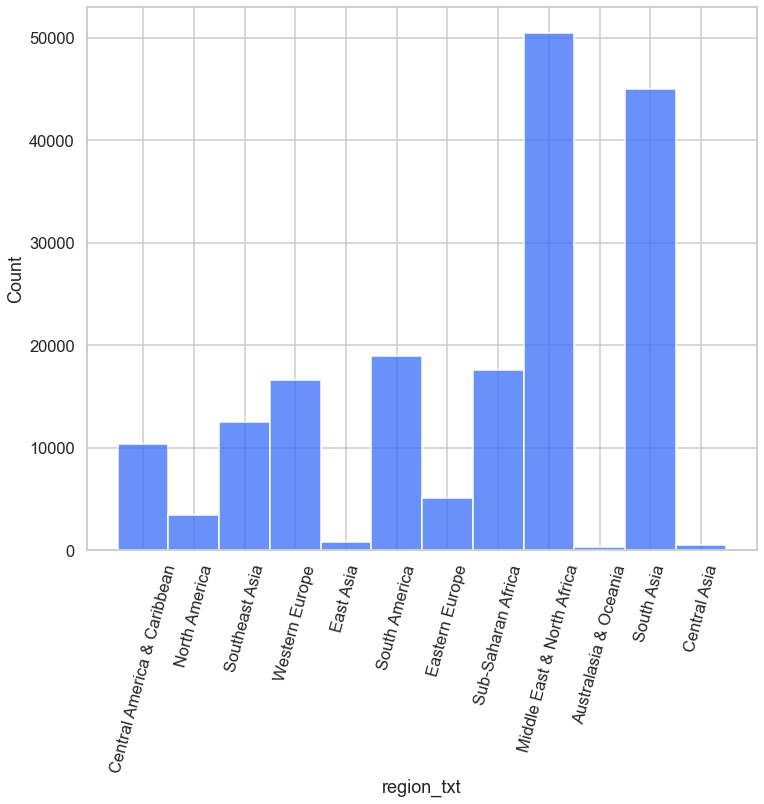

In [95]:
plt.figure(figsize=(12,10))

sns.histplot(data['region_txt'])
plt.xticks(rotation=75)
plt.show()

Highest Number of attacks were observed in Middle East and North Africa, followed by South Asia and South America.

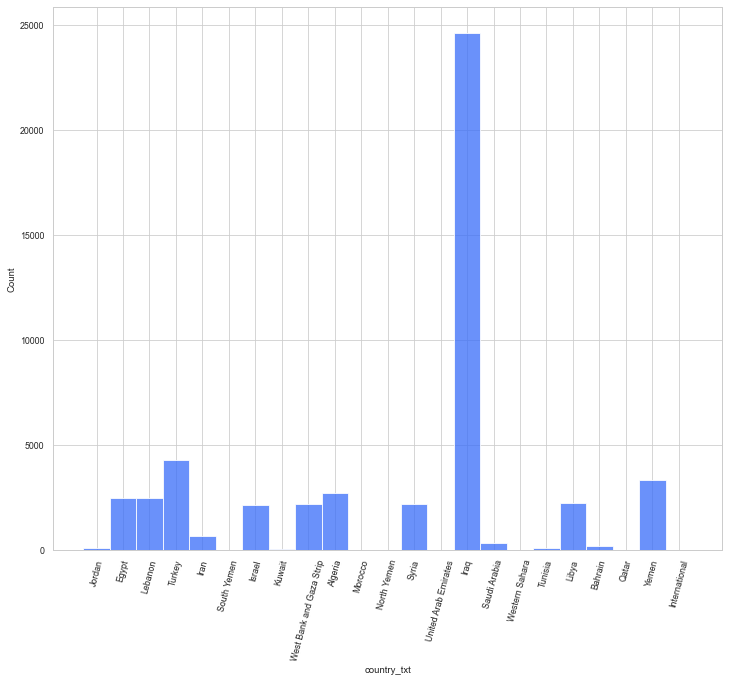

In [99]:
plt.figure(figsize=(12,10))

sns.histplot(data[data['region_txt']=='Middle East & North Africa']['country_txt'])
plt.xticks(rotation=75)
plt.show()

Within the Middle East and North African region we find the countires with highest counts are Iraq, Turkey, Yemen, Algeria, Syria and Libya

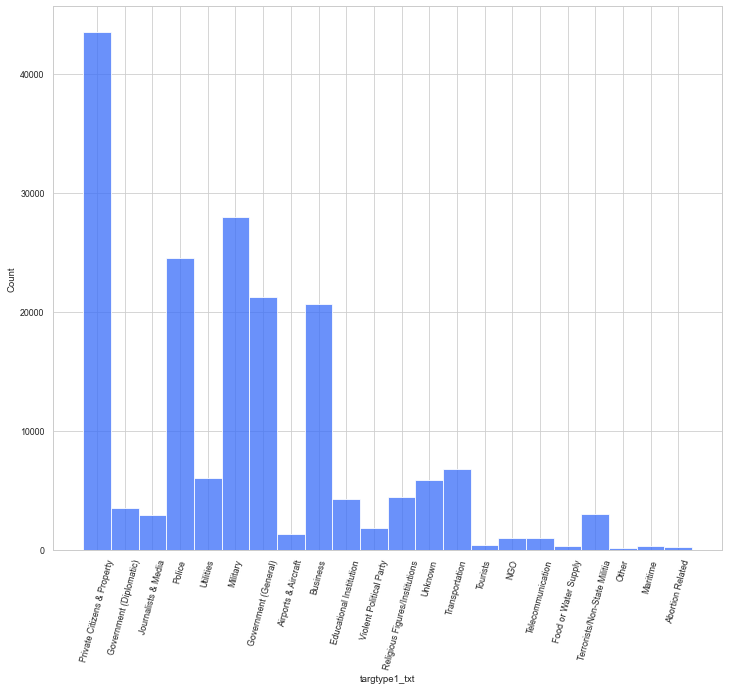

In [100]:
plt.figure(figsize=(12,10))

sns.histplot(data['targtype1_txt'])
plt.xticks(rotation=75)
plt.show()

Highest Counts for target are found to be for Pivate citzens and property, Police, Military, Government and Business.

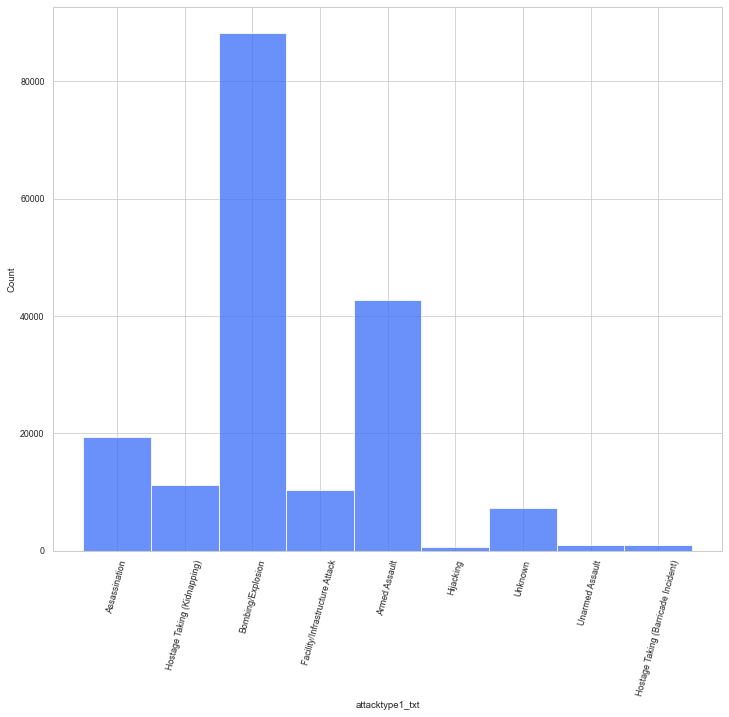

In [101]:
plt.figure(figsize=(12,10))

sns.histplot(data['attacktype1_txt'])
plt.xticks(rotation=75)
plt.show()

Most occuring attack types are Assasination, Bombing/Explosion and Armed Assault.

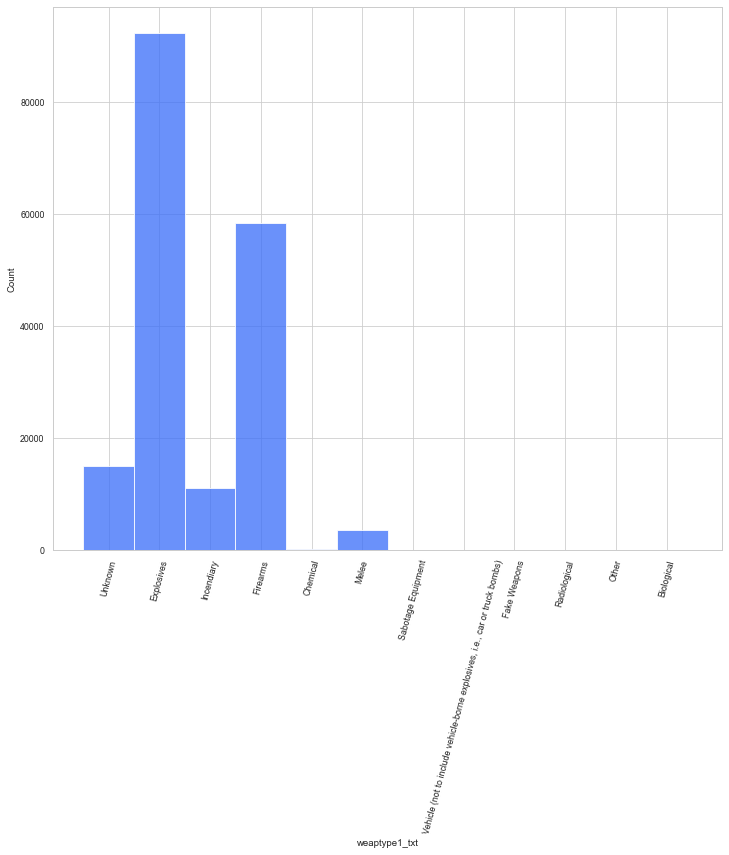

In [102]:
plt.figure(figsize=(12,10))

sns.histplot(data['weaptype1_txt'])
plt.xticks(rotation=75)
plt.show()

Most common weapong types are Explosives, Firearms and Incendiary.

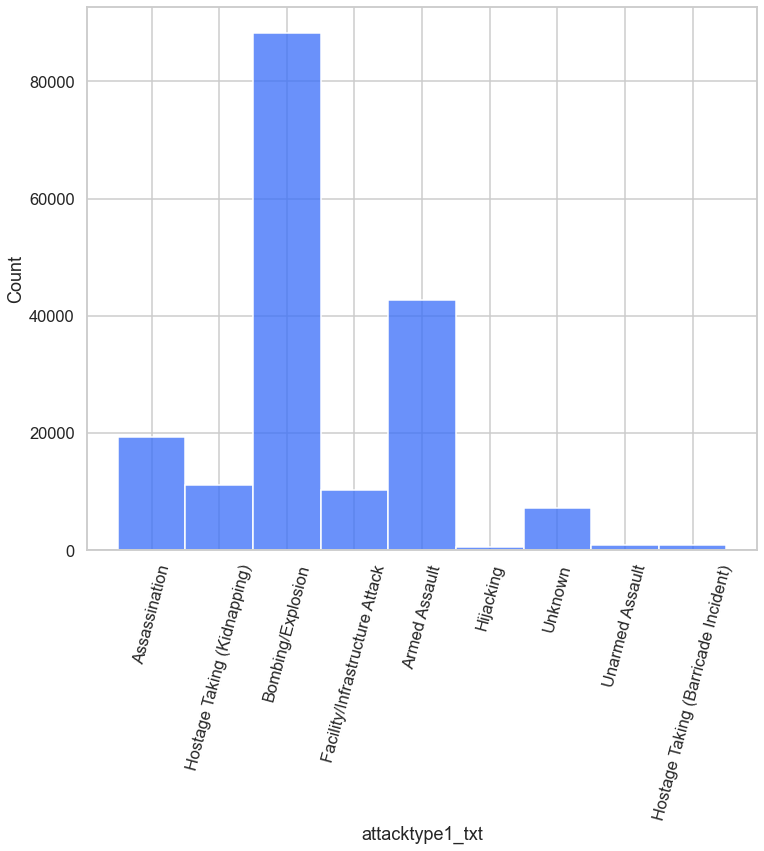

In [90]:
plt.figure(figsize=(12,10))

sns.histplot(data['attacktype1_txt'])
plt.xticks(rotation=75)
plt.show()

Highest number of attacks were of type bombing/explosion and armed assault.

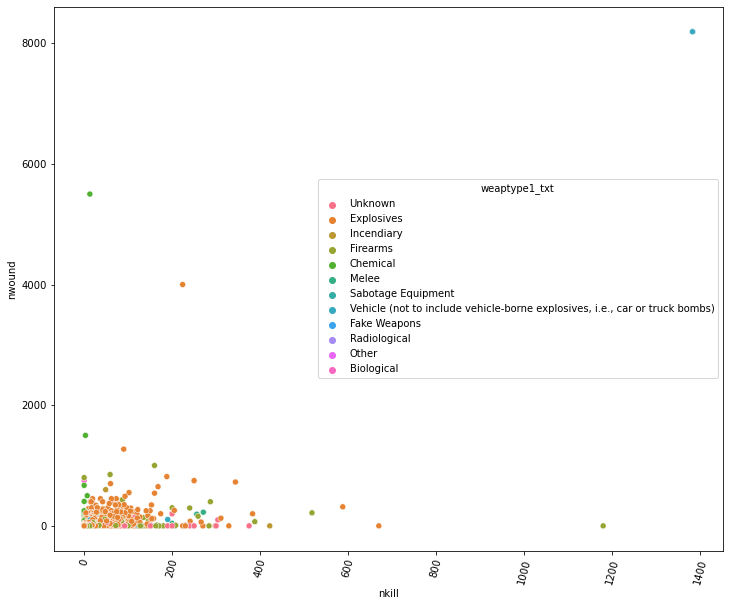

In [37]:
plt.figure(figsize=(12,10))

sns.scatterplot(x='nkill', y='nwound', data=data, hue='weaptype1_txt')
plt.xticks(rotation=75)
plt.show()

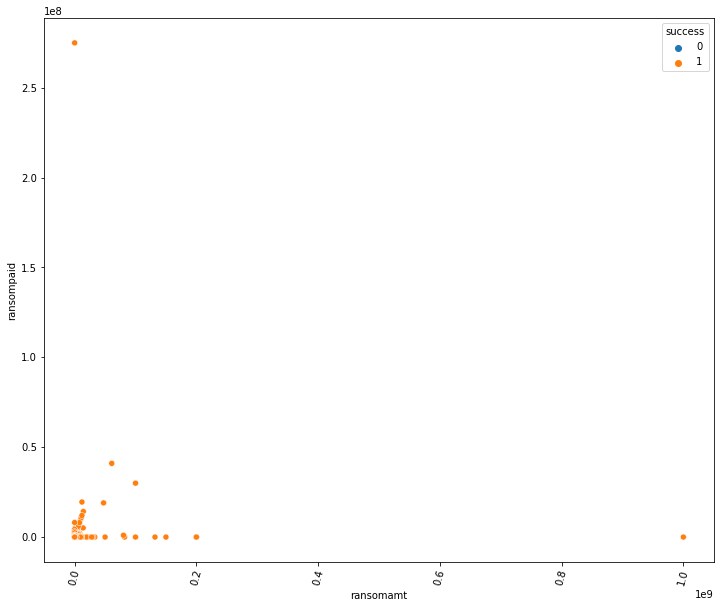

In [38]:
plt.figure(figsize=(12,10))

sns.scatterplot(x='ransomamt', y='ransompaid', data=data, hue='success')
plt.xticks(rotation=75)
plt.show()

<Figure size 1080x720 with 0 Axes>

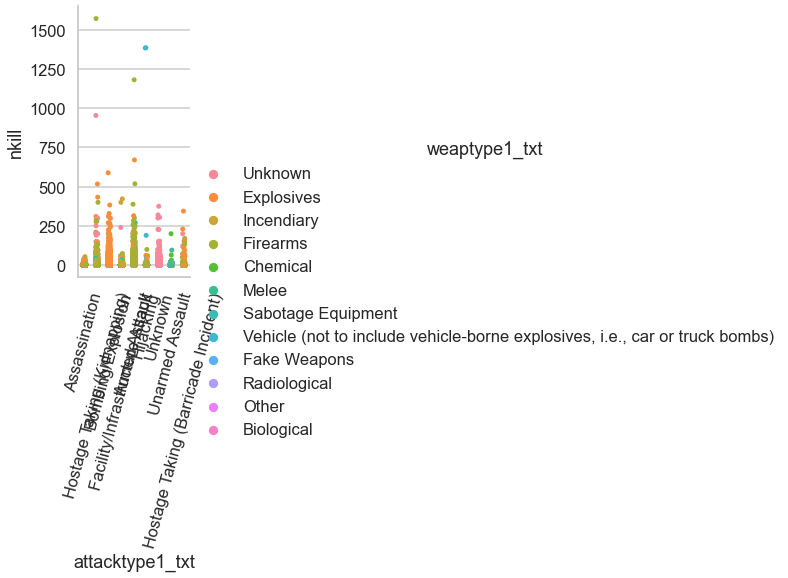

In [89]:
plt.figure(figsize=(15,10))

sns.catplot(y='nkill', x='attacktype1_txt', data=data, hue='weaptype1_txt')
plt.xticks(rotation=75)
plt.show()

Most number of deaths were a result of bombing, armed assult and hostage taking. Weapons mainly used were respectively explosives, firearms and both.

In [62]:
def criteria(df):
    col = []
    for index,x in df.iterrows():
        if x['crit1'] == 1:
            if x.crit2 == 1:
                col.append(2)
            elif x.crit3 == 1:
                col.append(3)
            else:
                col.append(1)
        elif x.crit2 == 1:
            if x.crit3 == 1:
                col.append(4)
            else:
                col.append(5)
        elif x.crit3 == 1:
            col.append(6)
        else:
            col.append(7)
    return col

In [63]:
data['crit'] = criteria(data)

In [64]:
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
points.crs = {'init':'epsg:4326'}

c:\Users\kulsum kamal\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [65]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [66]:
points = points.to_crs(epsg=32630)
world = world.to_crs(epsg=32630)

<AxesSubplot:>

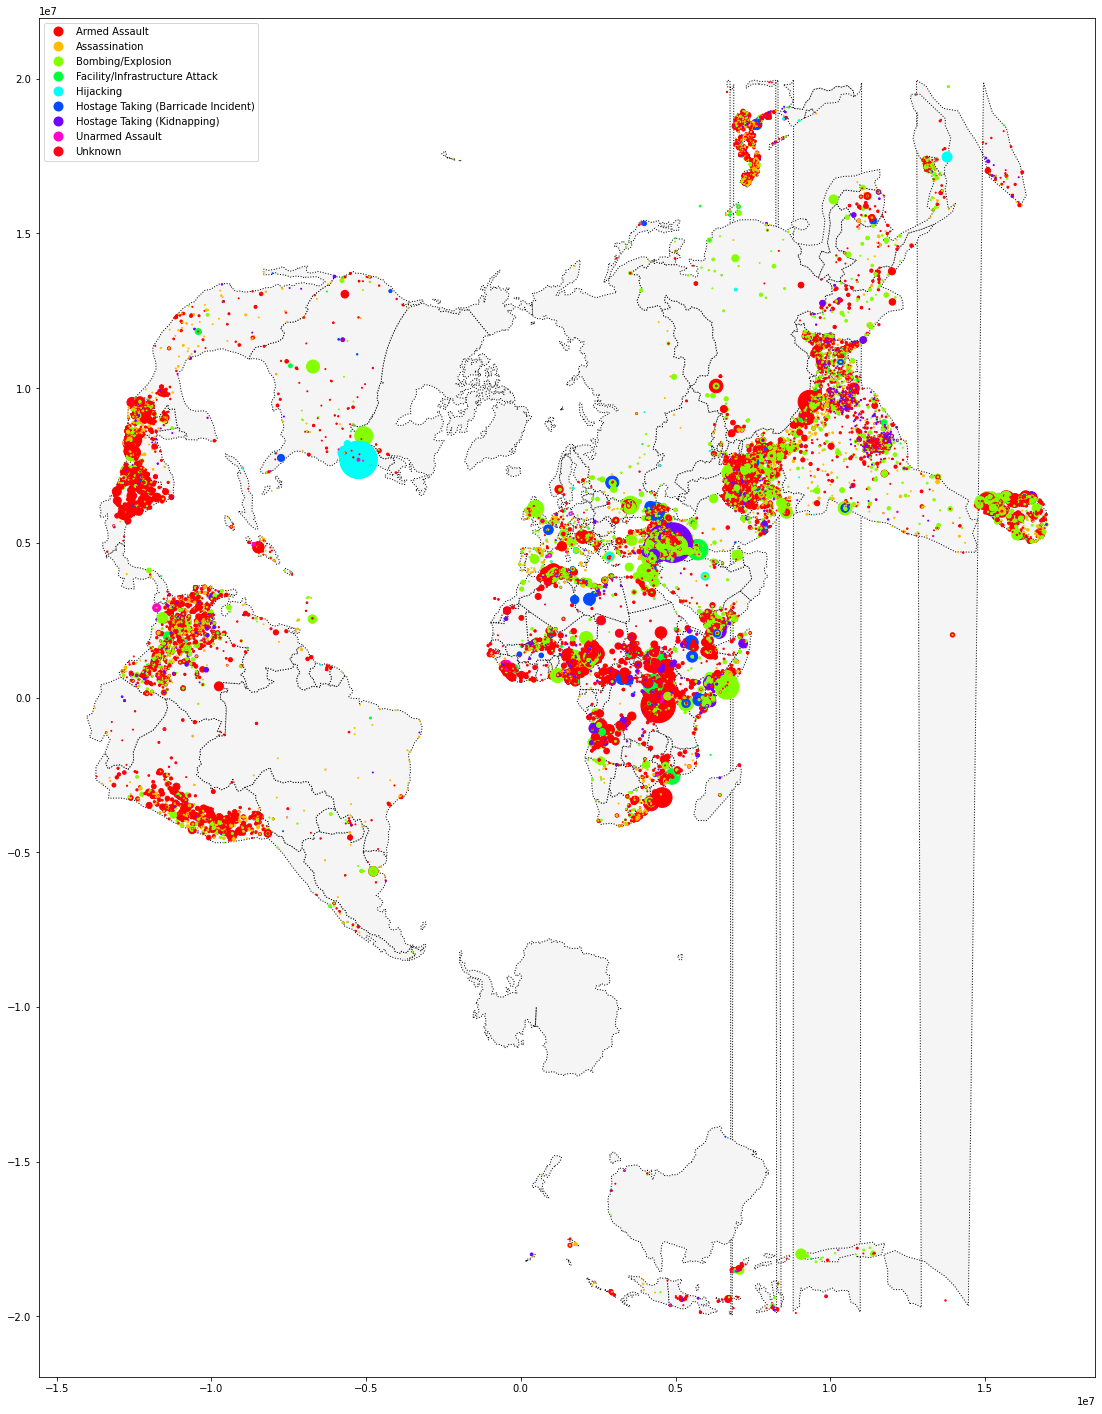

In [67]:
ax =world.plot(figsize=(25,25), color='whitesmoke', linestyle=':', edgecolor='black')
points.plot(ax =ax, marker='o',  markersize='nkill', cmap='hsv', column='attacktype1_txt', legend=True)

Size of markers indicate the no of deaths relatively. Colours indicate the type of attacks. Highest number of deths observed are in areas of central Africa and Middle East. Attacks are mainly concentrated in Central Africa, Middle East, southern North America, northern South America and Eastern South America.

<AxesSubplot:>

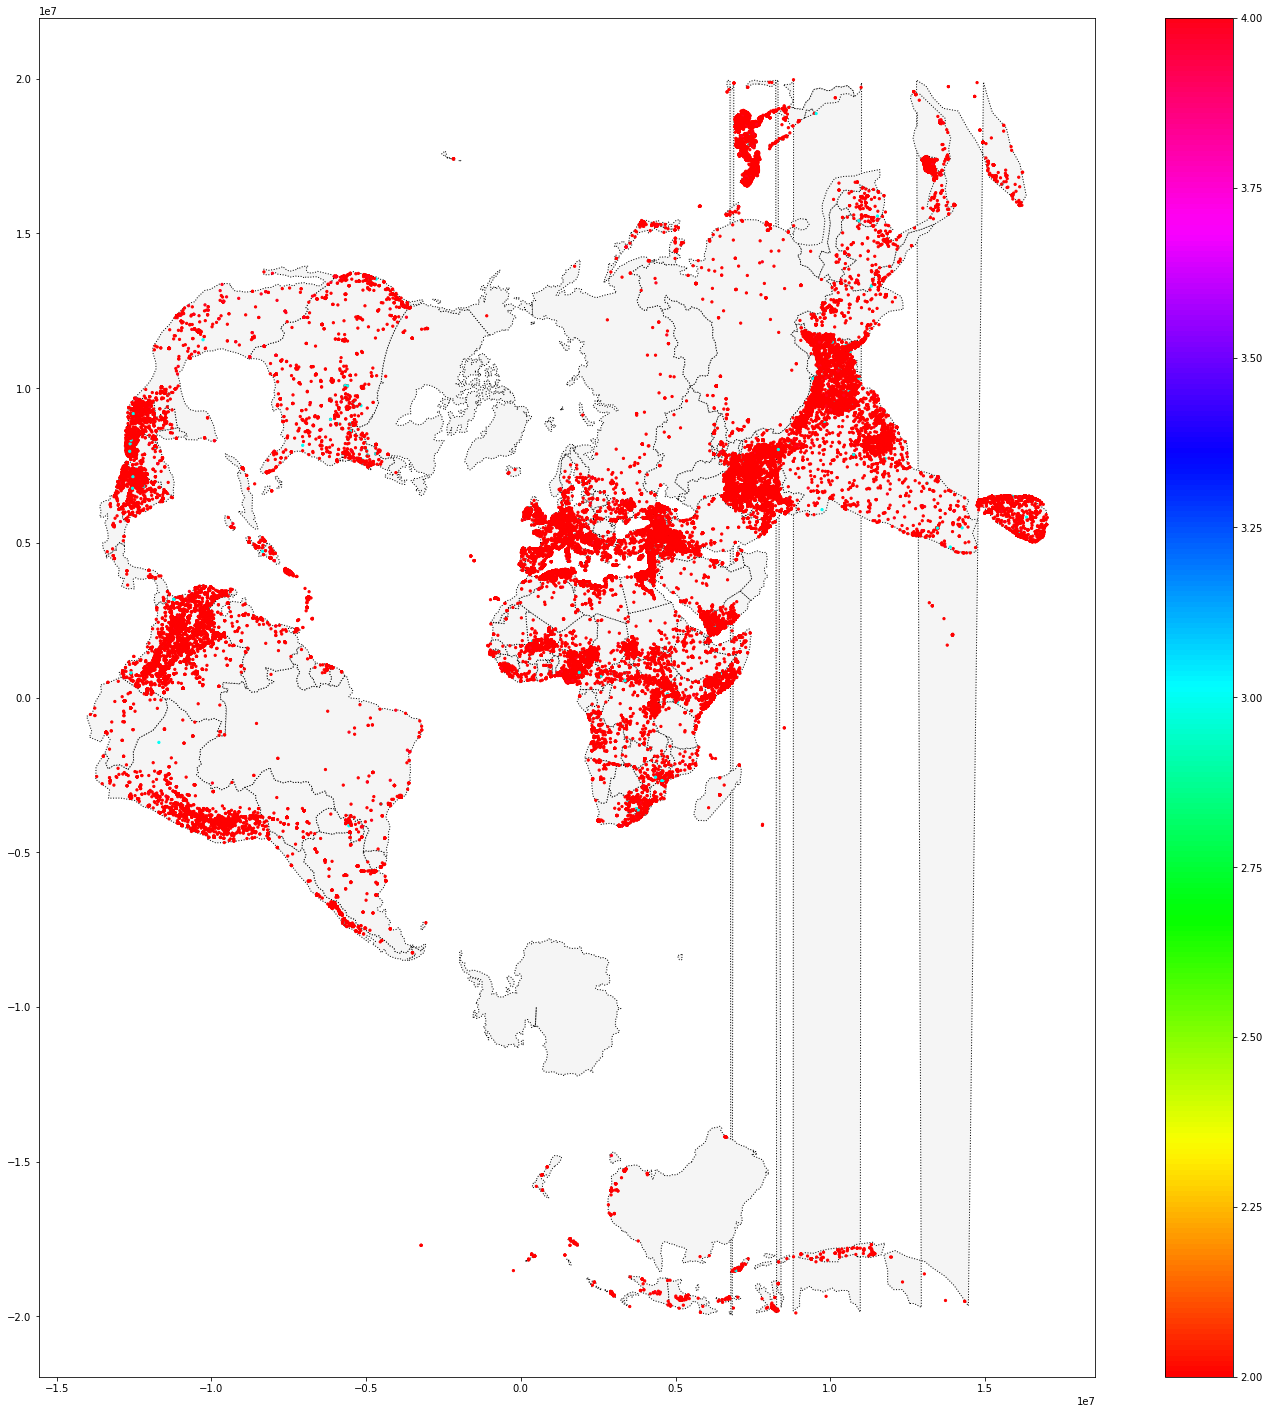

In [70]:
ax =world.plot(figsize=(25,25), color='whitesmoke', linestyle=':', edgecolor='black')
points.plot(ax =ax, marker='o',  markersize=5, cmap='hsv', column='crit', legend=True)

The attacks distributively show a clear relationship that most attacks were based on a combination of criterion 1 and criterion 2, with few attacks being a combination of 1 and 3:

Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
The violent act must be aimed at attaining a political, economic, religious, or social goal. 
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure 
profit motive or from an idiosyncratic personal motive unconnected with broader 
societal change.

Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) 
(CRIT2)
To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or 
convey some other message to a larger audience (or audiences) than the immediate 
victims. Such evidence can include (but is not limited to) the following: pre- or post-attack statements by the perpetrator(s), past behavior by the perpetrators, or the 
particular nature of the target/victim, weapon, or attack type.

Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)
The action is outside the context of legitimate warfare activities, insofar as it targets 
non-combatants (i.e. the act must be outside the parameters permitted by international 
humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of 
12 August 1949 and elsewhere).

<AxesSubplot:>

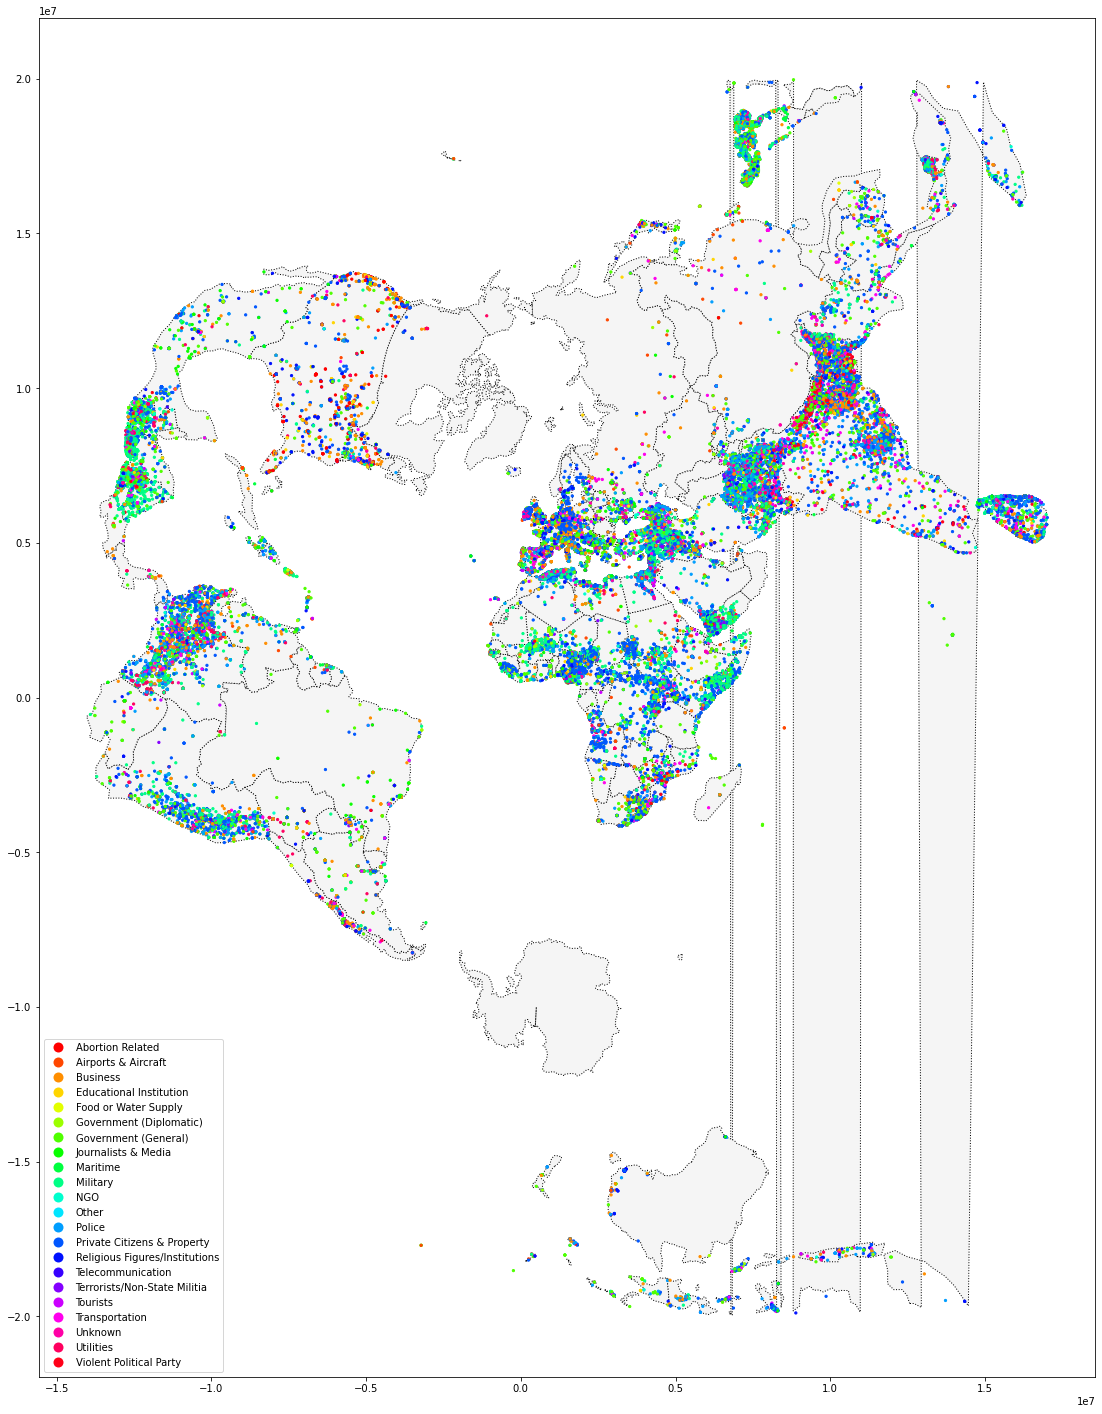

In [72]:
ax =world.plot(figsize=(25,25), color='whitesmoke', linestyle=':', edgecolor='black')
points.plot(ax =ax, marker='o',  markersize=5, cmap='hsv', column='targtype1_txt', legend=True)

In [ ]:
data.rename(columns={'iyear': 'year',
                   'imonth': 'month',
                   'iday':'day'},
          inplace=True, errors='raise')

In [79]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

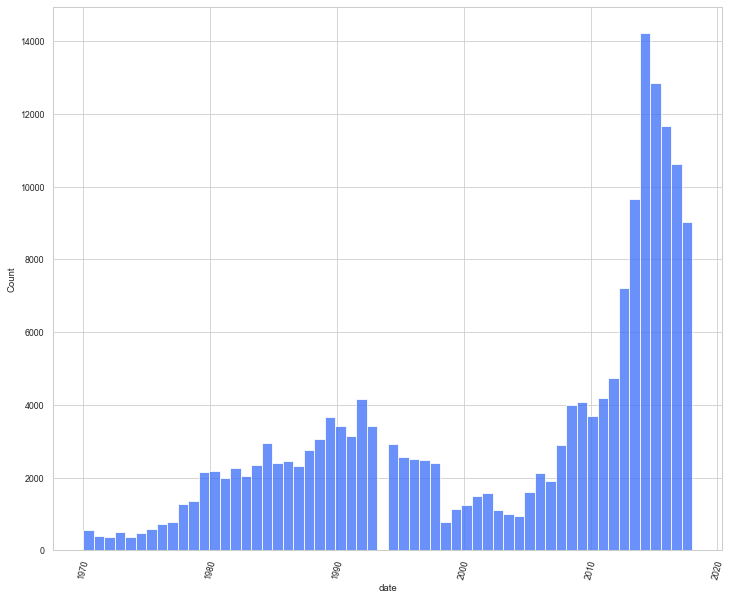

In [105]:
plt.figure(figsize=(12,10))
sns.histplot(data['date'])
plt.xticks(rotation=75)
plt.show()

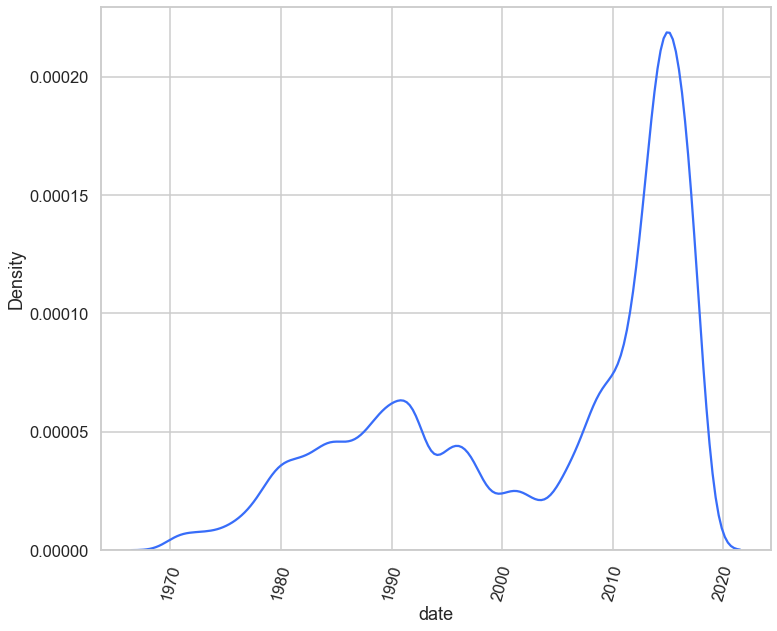

In [87]:
plt.figure(figsize=(12,10))
sns.kdeplot(data['date'])
plt.xticks(rotation=75)
plt.show()

Highest recorded terrorism attacks were observed between 2010 to 2020.

In [103]:
X.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')